In [207]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib .pyplot as plt
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')
import IPython.display as ipd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
import soundfile as sf
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D,LSTM
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D,GlobalAveragePooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
from livelossplot.keras import PlotLossesCallback
from sklearn import svm



import tensorflow as tf
print("Tensorflow version:", tf.__version__)


Tensorflow version: 2.7.0


In [208]:
paths = []
labels = []

for dirname, _, filenames in os.walk('D:\speech_data1\Audio Dataset\Audio Dataset'):
    
    for filename in filenames:
        paths.append(os.path.join(dirname,filename))
        labels.append(filename.replace(filename,dirname))
        
         

In [209]:
labels[:5]

['D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry',
 'D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry',
 'D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry',
 'D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry',
 'D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry']

In [210]:
mainlabels = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Angry', 'Angry'), labels))
mainlabels1 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Disgust', 'Disgust'), mainlabels))
mainlabels2 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Fear', 'Fear'), mainlabels1))
mainlabels3 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Happy', 'Happy'), mainlabels2))
mainlabels4 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Neutral', 'Neutral'), mainlabels3))
mainlabels5 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Sad', 'Sad'), mainlabels4))
mainlabels6 = list(map(lambda x: x.replace('D:\\speech_data1\\Audio Dataset\\Audio Dataset\\Surprise', 'Surprise'), mainlabels5))

print(mainlabels6)

['Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 

In [235]:
df = pd.DataFrame()
df['speech']=paths
df['label']=mainlabels6
df.head(5)
# print(df['label'])


,speech,label
0,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry
1,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry
2,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry
3,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry
4,D:\speech_data1\Audio Dataset\Audio Dataset\An...,Angry


In [236]:
a=df['label'].value_counts()
a



Neutral     819
Angry       817
Sad         726
Fear        708
Happy       682
Surprise    653
Disgust     570
Name: label, dtype: int64

In [213]:
data = [["Neutral",819],["Angry",817],["Sad",726],["Fear",708],["Happy",682],["Surprise",653],["Disgust",570]]
df1=pd.DataFrame(data,columns=['Emotions','Valuecount'])
df1

,Emotions,Valuecount
0,Neutral,819
1,Angry,817
2,Sad,726
3,Fear,708
4,Happy,682
5,Surprise,653
6,Disgust,570


In [214]:
df['speech'].value_counts().sum()

4975

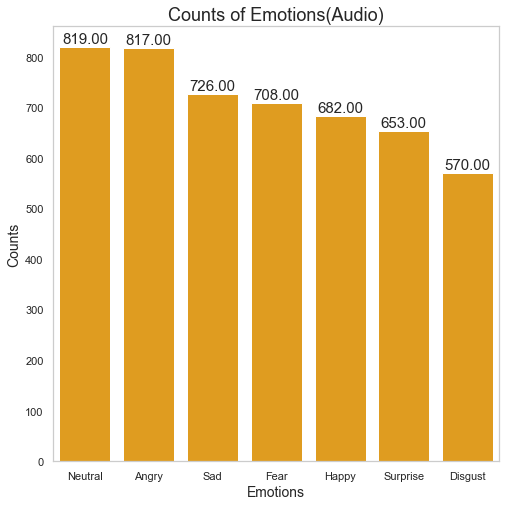

In [215]:
import seaborn as sns
plt.figure(figsize=(8, 8))
plots = sns.barplot(x="Emotions", y="Valuecount", data=df1,color='orange')
for bar in plots.patches:
      plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
        
plt.xlabel("Emotions", size=14)
 
# Setting the label for y-axis
plt.ylabel("Counts", size=14)
 
# Setting the title for the graph
plt.title("Counts of Emotions(Audio)",size=18)
plt.grid(False)
 
# Finally showing the plot
plt.show()        


In [216]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()
    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()
    


In [217]:
from IPython.display import Audio

In [218]:
# data,sampling_rate = librosa.load(path)
# sampling_rate

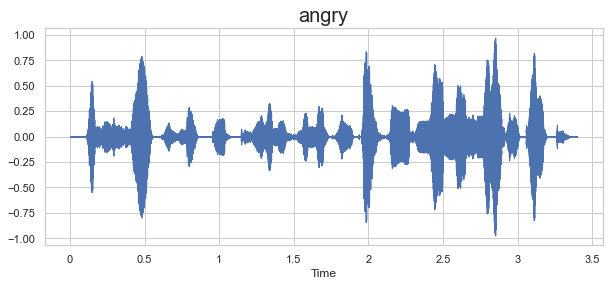

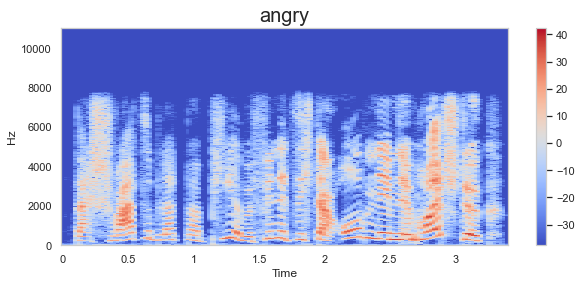

In [219]:
#we can also disply waveplot and specsplot for all the classes  

emotion='angry'
path=df.iat[30,0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


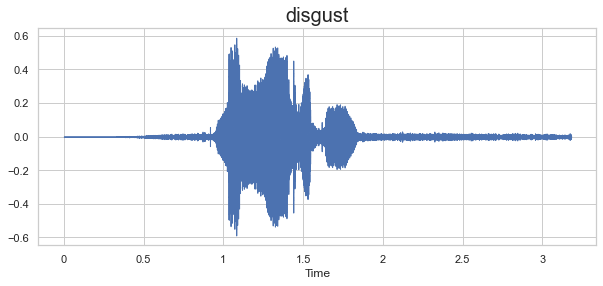

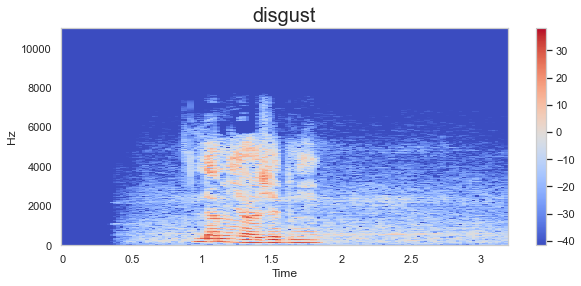

In [220]:
emotion='disgust'
path=df.iat[819,0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)


# Augmentation

In [221]:
#adding background noise
def add_white_noise(signal, noise_factor):
    noise = np.random.normal(0,signal.std(),signal.size)
    augmented_data = signal + noise_factor * noise
    # Cast back to same data type
    return augmented_data


In [222]:
if __name__ =="__main__":
    signal,sr = librosa.load(df['speech'][30])
    augmented_signal = add_white_noise(signal,0.5)
    sf.write("augg1.wav",augmented_signal,sr)
   

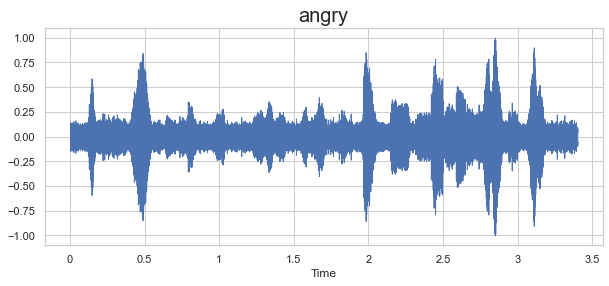

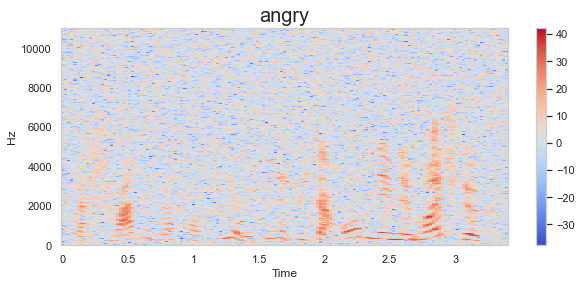

In [223]:
emotion='angry'
data,sampling_rate = librosa.load("augg1.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg1.wav")

In [224]:
#time scaling
def time_stretch(df,stretch_rate):
    return librosa.effects.time_stretch(df,stretch_rate)


In [225]:
if __name__ =="__main__":
    df,sr = librosa.load(df['speech'][30])
    augmented_signal = time_stretch(df,0.5)
    sf.write("augg2.wav",augmented_signal,sr)
   

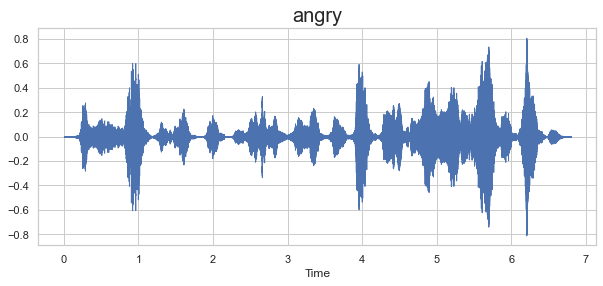

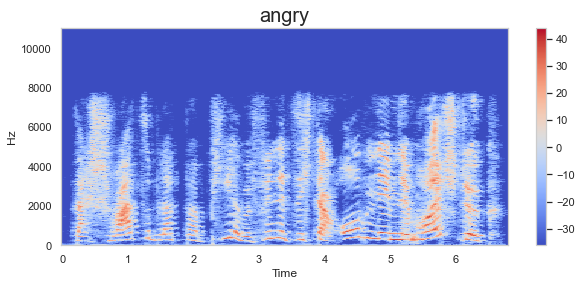

In [226]:
emotion='angry'
data,sampling_rate = librosa.load("augg2.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg2.wav")

In [227]:
#pitch scaling
def pitch_scale(signal,sr,num_semitones):
    return librosa.effects.pitch_shift(signal,sr,num_semitones)

In [228]:
if __name__ =="__main__":
    df,sr = librosa.load('4-m-20-0-2-148.wav')
    augmented_signal = pitch_scale(df,sr,12)
    sf.write("augg3.wav",augmented_signal,sr)

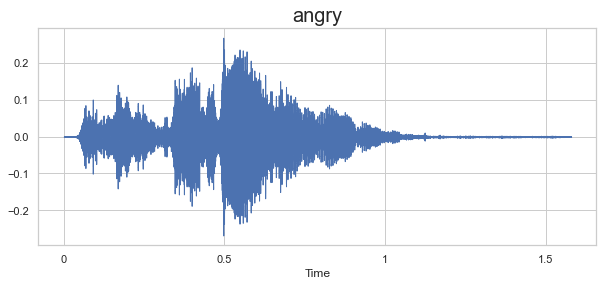

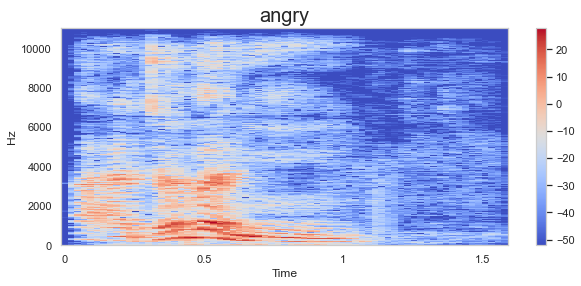

In [229]:
emotion='angry'
data,sampling_rate = librosa.load("augg3.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg3.wav")


In [230]:
#Random gain scaling
import random
def randomg_gain(df,min_gain_factor,max_gain_factor):
    gain_factor = random.uniform(min_gain_factor,max_gain_factor)
    return df * gain_factor

In [231]:
if __name__ =="__main__":
    df,sr = librosa.load('4-m-20-0-2-148.wav')
    augmented_signal = randomg_gain(df,2,6)
    sf.write("augg4.wav",augmented_signal,sr)

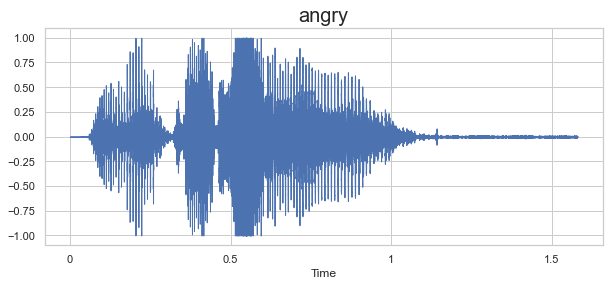

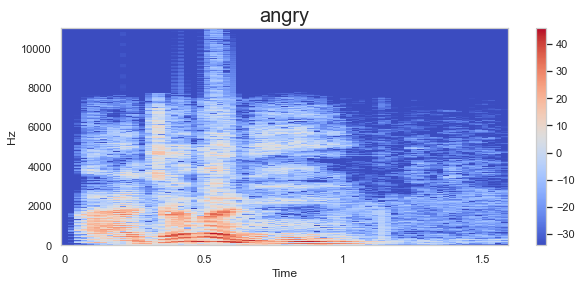

In [232]:
data,sampling_rate = librosa.load("augg4.wav")
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio("augg4.wav")


# Feature Extraction

In [233]:
def extract_mfcc(filename):
    y,sr = librosa.load(filename,duration=3,offset=0.5,res_type='kaiser_fast')
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [237]:
extract_mfcc(df['speech'][0])

array([-4.34857483e+02,  1.13806709e+02, -2.80842819e+01,  4.67693253e+01,
       -6.62311971e-01, -1.22168455e+01, -3.68304157e+00, -1.18129387e+01,
       -4.91973448e+00, -2.17101049e+00, -2.66553521e+00, -3.58675033e-01,
       -4.21081686e+00, -9.79485893e+00,  3.86956286e+00, -1.29496419e+00,
       -3.73397255e+00,  9.94346559e-01,  4.32907164e-01, -2.85805488e+00,
       -7.83589125e+00,  1.40436316e+00, -3.91935873e+00, -4.38161612e+00,
        1.18947729e-01, -3.20929813e+00,  1.27311492e+00,  2.34517217e-01,
       -2.20603132e+00, -6.29030049e-01, -1.64104894e-01, -4.18164444e+00,
        4.02297974e-01,  1.11620665e+00, -5.15712023e+00, -1.99951530e+00,
       -3.78106976e+00, -4.57532549e+00, -4.08243942e+00, -4.15722179e+00],
      dtype=float32)

In [238]:
X_mfcc = df['speech'].apply(lambda x:extract_mfcc(x))
X_mfcc

0       [-434.85748, 113.80671, -28.084282, 46.769325,...
1       [-480.92023, 99.43582, -35.679676, 65.717094, ...
2       [-226.69179, 95.11993, -73.66531, 41.528965, -...
3       [-240.40167, 94.57178, -58.944378, 54.096592, ...
4       [-282.79556, 103.31378, -68.86788, 38.481617, ...
                              ...                        
4970    [-262.84146, 115.41763, -2.5604846, 28.536448,...
4971    [-326.23785, 94.4351, 8.209972, 30.855536, -8....
4972    [-301.2211, 81.24696, 0.19075769, 29.471455, 1...
4973    [-262.14603, 98.11836, -5.5850673, 35.08944, -...
4974    [-280.18356, 75.58335, 10.810878, 33.449093, -...
Name: speech, Length: 4975, dtype: object

In [239]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(4975, 40)

In [240]:
X = np.expand_dims(X,-1)
X.shape

(4975, 40, 1)

In [241]:
# to categoriacl
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [242]:
y=y.toarray()

In [243]:
y.shape

(4975, 7)

In [244]:

# y = y
# y.resize((4975,1),refcheck=False)
# y.shape


In [245]:
# from sklearn.model_selection import train_test_split

# # x_train ,x_test,y_train,y_test = train_test_split(df,test_size=0.2)   

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [246]:
# from sklearn.model_selection import cross_validate
# def cross_validation(model, X_train, y_train, _cv=5):
    
#     scoring = ['accuracy']
#     results = cross_validate(estimator=model,
#                                X_train1=X_train,
#                                y_train1=y_train,
#                                cv=_cv,
#                                scoring=scoring,
#                                return_train_score=True)
        
#     return{"Training Accuracy scores": results['train_accuracy'],
#             "Mean Training Accuracy": results['train_accuracy'].mean()*100}   

In [247]:
import numpy as np
from sklearn.model_selection import KFold

X = X
y = y
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2488 2489 2490 ... 4972 4973 4974] TEST: [   0    1    2 ... 2485 2486 2487]
TRAIN: [   0    1    2 ... 2485 2486 2487] TEST: [2488 2489 2490 ... 4972 4973 4974]


In [248]:
# kfold = StratifiedKFold(n_splits=N_SPLIT,shuffle=True,random_state=42)

# # Variable for keeping count of split we are executing

# j = 0

# # K-fold Train and test for each split

# for train_idx, val_idx in list(kfold.split(train_x,train_y)):

#     x_train_df = df.iloc[train_idx]

#     x_valid_df = df.iloc[val_idx]

#     j+=1

#     training_set = train_datagen.flow_from_dataframe(dataframe=x_train_df, directory=X_train, class_mode="categorical")


In [249]:
model = Sequential()

model.add(Conv2D(40,(3,3),padding='same',input_shape=(40,1,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
          
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
          
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.10))
          
model.add(Flatten()) 
          
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))          
          

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.10))          
          

          
model.add(Dense(7,activation='softmax'))
opt = Adam(lr=0.0005)


checkpoint = ModelCheckpoint("AudioF",monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.001,model='auto')

callbacks=[PlotLossesCallback(),checkpoint,reduce_lr]
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()          

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 40, 1, 40)         400       
                                                                 
 batch_normalization_30 (Bat  (None, 40, 1, 40)        160       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 40, 1, 40)         0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 40, 1, 40)        0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 40, 1, 40)         0         
                                                                 
 conv2d_21 (Conv2D)          (None, 40, 1, 128)       

In [250]:
model.save('Audio_.h5')

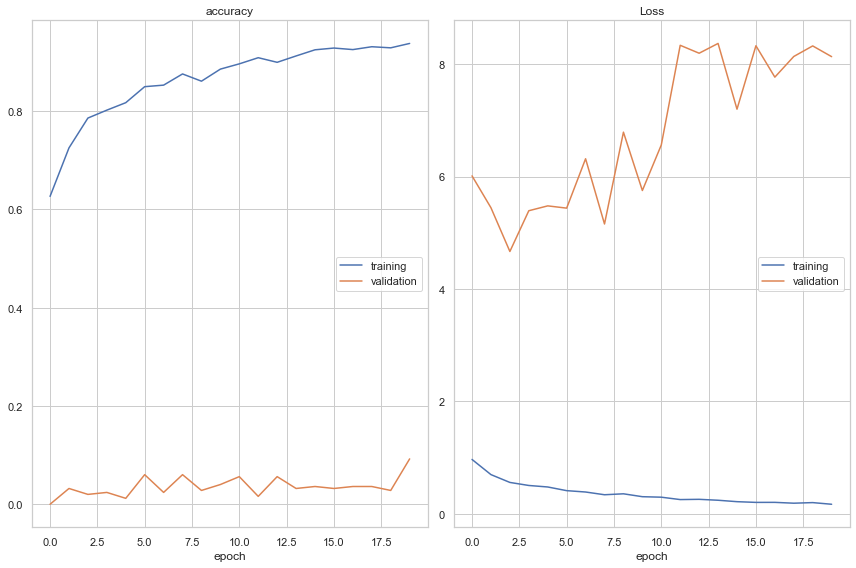

accuracy
	training         	 (min:    0.627, max:    0.938, cur:    0.938)
	validation       	 (min:    0.000, max:    0.092, cur:    0.092)
Loss
	training         	 (min:    0.169, max:    0.966, cur:    0.169)
	validation       	 (min:    4.669, max:    8.372, cur:    8.137)

Epoch 00020: saving model to AudioF
224/224 [==============================] - 32s 141ms/step - loss: 0.1685 - accuracy: 0.9379 - val_loss: 8.1371 - val_accuracy: 0.0924 - lr: 5.0000e-04


In [251]:
history=model.fit(X_train,y_train,validation_split=0.1,epochs=20,batch_size=10,shuffle=True,callbacks=callbacks)


In [254]:
test_loss, test_acc = model.evaluate(X_test, y_test)

78/78 [==============================] - 3s 41ms/step - loss: 14.7940 - accuracy: 0.0016


In [129]:
y_pred = model.predict(X_test)

y_pred

array([[1.3544713e-04, 8.3497747e-05, 6.2301908e-05, ..., 9.9950790e-01,
        6.0383063e-05, 8.4121093e-05],
       [5.7018406e-06, 1.1362006e-03, 3.1163162e-04, ..., 1.2162598e-04,
        3.2896639e-07, 9.9666268e-01],
       [2.0451694e-04, 3.6867908e-07, 1.6701022e-04, ..., 9.9926203e-01,
        1.2217139e-07, 3.6566929e-04],
       ...,
       [5.8261230e-05, 3.5662553e-03, 2.7079212e-05, ..., 1.3367139e-05,
        1.0163207e-04, 9.9361503e-01],
       [1.2966095e-06, 9.9983954e-01, 5.9272148e-05, ..., 1.0648205e-05,
        1.1261074e-05, 7.0884089e-05],
       [9.0532721e-04, 3.0690618e-02, 8.4348008e-02, ..., 6.8377610e-04,
        7.7756360e-02, 7.5874847e-01]], dtype=float32)

In [130]:
lab=df['label'].unique()
lab

array(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'],
      dtype=object)

In [131]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics




y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[128   7   5   5   4   3   6]
 [  2  82   4   6   2   4   5]
 [  3   0 117   0   5   4   8]
 [ 10   0   7 101   3   3   7]
 [  1   0  13   3 127   8   5]
 [  1   1   3   2   1 145   2]
 [ 11   4   5  10   3   6 113]]


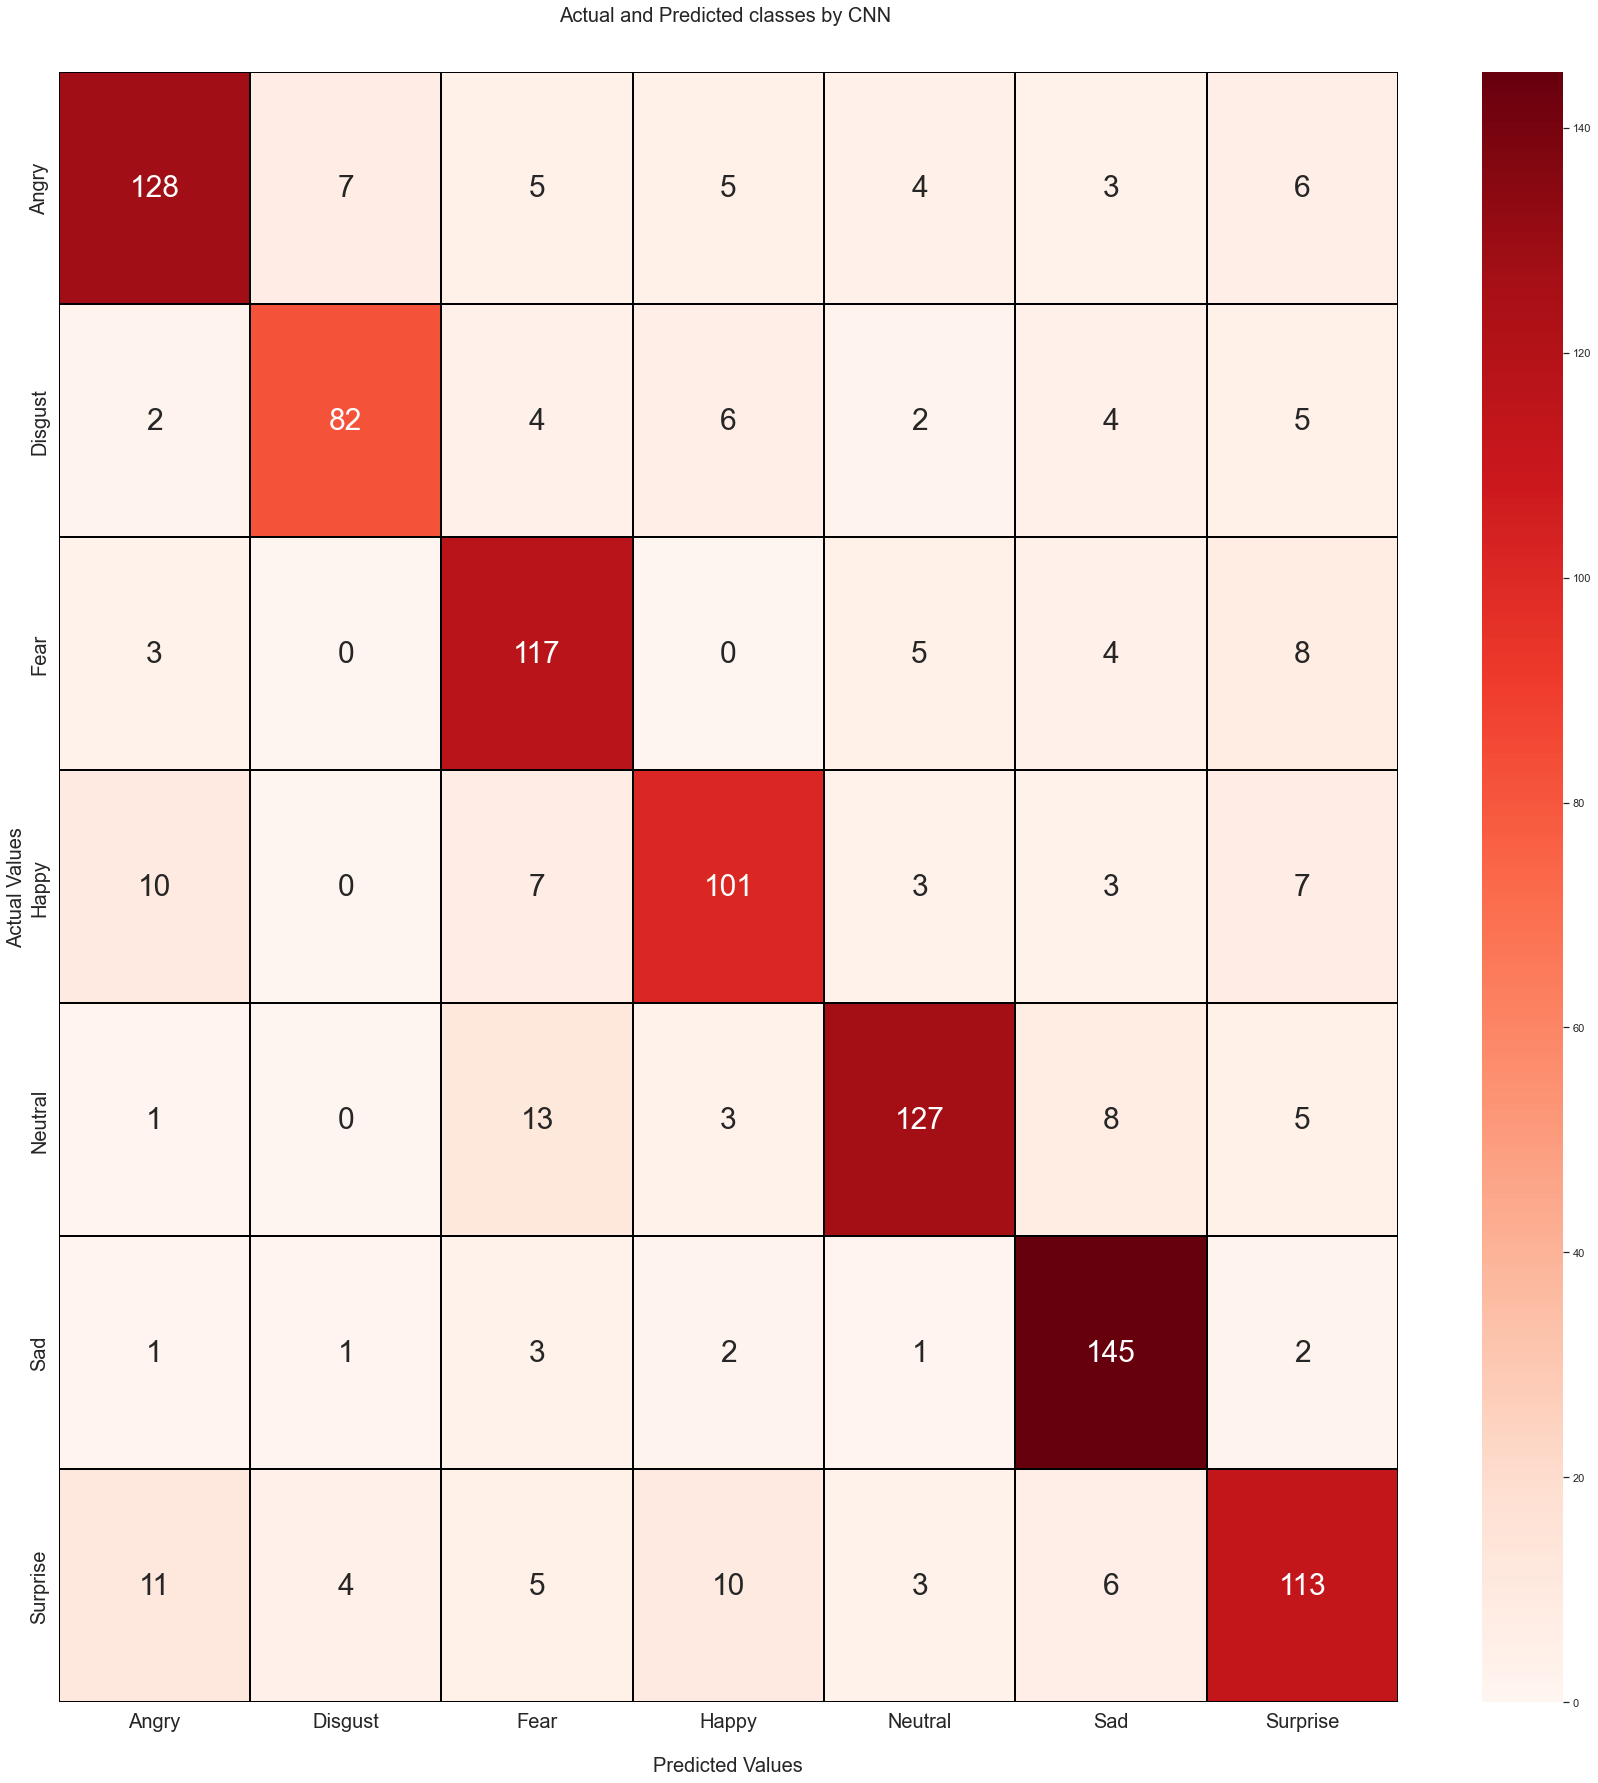

In [132]:

import seaborn as sns
f,ax = plt.subplots(1,1,figsize=(30,30))
ax = sns.heatmap(cm, annot=True, cmap='Reds',ax=ax,annot_kws={"size": 30}, fmt='g',linewidths=0.1, linecolor='black')

ax.set_title('Actual and Predicted classes by CNN \n\n',fontsize = 20);
ax.set_xlabel('\nPredicted Values',fontsize = 20)
ax.set_ylabel('Actual Values',fontsize = 20);


ax.xaxis.set_ticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']); ax.yaxis.set_ticklabels(['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']);
ax.tick_params(labelsize=20)
# ## Display the visualization of the Confusion Matrix.
# plt.show()


In [169]:
# Print the accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred,average = 'macro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))
print("f1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='macro'))

0.8170854271356784
Precision Score :  0.8194077224369659
Recall Score :  0.8148440070335388
f1 Score :  0.8157245544072286


In [158]:
 pip install --upgrade scikit-learn

In [170]:
import sklearn

y_pred_proba = tree.predict_proba(X_test)

AttributeError: module 'sklearn.tree' has no attribute 'predict_proba'

In [149]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Compute ROC curve and ROC area for each class

roc_auc_score(y_test,y_pred,multi_class = "ovr")


AxisError: axis 1 is out of bounds for array of dimension 1

In [79]:
import pandas as pd

df2 = pd.DataFrame([['Angry', 130,   7,   2,   5,   5,   3,   2], ['Disgust',  9, 108,   1,  10,   0,   2,   0], ['Fear',  7 ,  3,  95,   4,   8,   4,   0],
                   ['Happy', 5,   2,   2, 112,   3,   4,   7],['Neutral', 2,   1,   6,   2, 146,   6,   6],['Sad',3,   4,   3,   3,   0, 134,   2],['Surprise',11,  10,   3,  11,   7,   5,  90]],
                  columns=['Predictedclasses','Angry', 'Disgust', 'Fear', 'Happy', 'Neutral','sad','Surprise'])


# index=df2.index
# for i in index:
#     print(i)
 

<AxesSubplot:title={'center':'Stacked Bar Graph of predicted count of each classes'}, xlabel='Predictedclasses'>

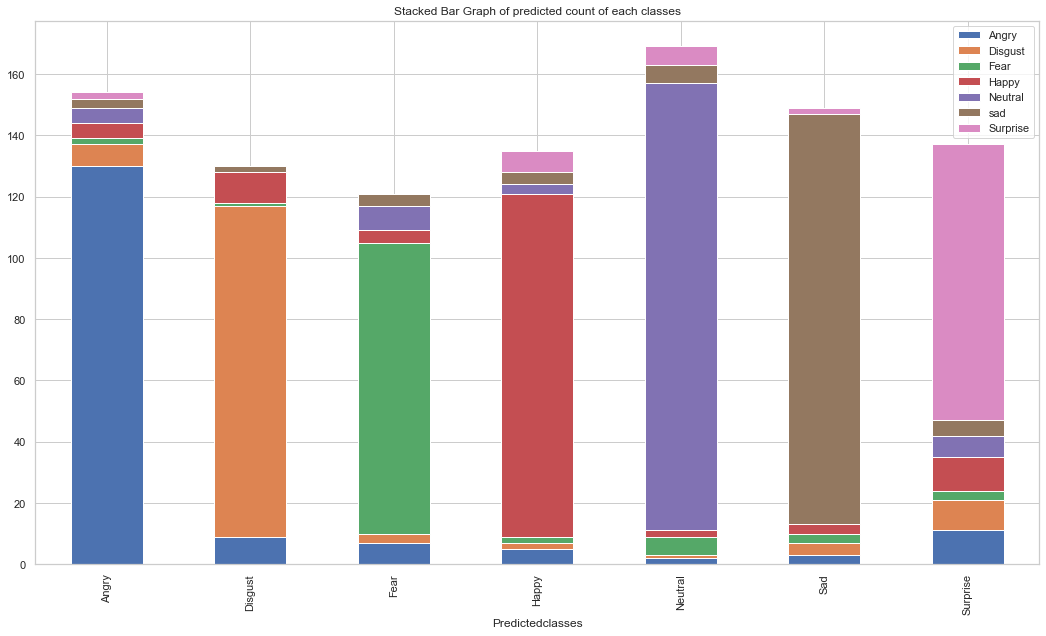

In [84]:
import matplotlib.pyplot as plt



df2.plot(x='Predictedclasses', kind='bar', stacked=True,
        title='Stacked Bar Graph of predicted count of each classes',figsize=(18,10))


In [ ]:
# #Serialize the model and save
# import joblib
# joblib.dump(model, 'mixcnn.pkl')
# print("CNN Model Saved")
# #Load the model
# lr = joblib.load('mixcnn.pkl')
# # Save features from training
# rnd_columns = list(X.columns)
# joblib.dump(rnd_columns, 'rnd_columns.pkl')
# print("Random Forest Model Colums Saved")

In [ ]:
from keras.models import Sequential
model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1),activation='tanh',recurrent_activation="tanh",
    use_bias=True,
    kernel_initializer="glorot_uniform",
    recurrent_initializer="orthogonal",
    bias_initializer="zeros",go_backwards=True,dropout=0.8,
    recurrent_dropout=0.6,),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(256,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    
])


checkpoint = ModelCheckpoint("Audio.h5",monitor='val_accuracy',
                            save_weights_only=True,mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.1,model='auto')

callbacks=[PlotLossesCallback(),checkpoint,reduce_lr]

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [ ]:
history=model.fit(X,y,validation_split=0.2,epochs=20,batch_size=10,shuffle=True,callbacks=callbacks)

In [ ]:
history=model.fit(X,y,validation_split=0.2,epochs=20,batch_size=4,shuffle=True,callbacks=callbacks)

In [34]:
y_pred = model.predict(X_test)

y_pred

NameError: name 'model' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics



y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)



In [ ]:
df_cm = pd.DataFrame(cm, index = (0, 1,2,3,4,5,6), columns = (0, 1,2,3,4,5,6))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [ ]:
# Print the accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))
print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("f1 Score : ",f1_score(y_test, y_pred, 
                                           pos_label='positive',
                                           average='micro'))